## Proyecto Sprint 9
---
**Descripción del proyecto**

Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
un archivo con los pedidos en este periodo;
estadísticas de gastos de marketing.
Lo que vas a investigar: 

cómo los clientes usan el servicio;
cuándo empiezan a comprar;
cuánto dinero aporta cada cliente a la compañía;
cuándo los ingresos cubren el costo de adquisición de los clientes.

**Descripción de los datos**

La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario.
- Device: dispositivo del usuario.
- Start Ts: fecha y hora de inicio de la sesión.
- End Ts: fecha y hora de término de la sesión.
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla 'orders' (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido.
- Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.

La tabla 'costs' (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios.
- dt: fecha.
costs: gastos en esta fuente de anuncios en este día.

## Paso 1. Acceda los datos y prepáralos para el análisis

In [1]:
#Importar Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Cargar Datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')


## Paso 2. Haz informes y calcula métricas 

### Visitas

In [3]:
#¿Cuántas personas lo usan cada día, semana y mes?
visits.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
#Convierto a tipo de datos a to_datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

In [6]:
#EXtraer Formatos
visits['session_month'] = pd.to_datetime(visits['Start Ts']).dt.to_period('M').dt.start_time
visits['session_week'] = pd.to_datetime(visits['Start Ts']).dt.isocalendar().week
visits['session_day'] = pd.to_datetime(visits['Start Ts']).dt.date

In [7]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid', 'session_month',
       'session_week', 'session_day'],
      dtype='object')

In [8]:
new_list = []
for x in visits.columns:
    columns = x.lower()
    new_list.append(columns)

print(new_list)    
    

['device', 'end ts', 'source id', 'start ts', 'uid', 'session_month', 'session_week', 'session_day']


In [9]:
#Asigancion Directa
visits.columns = new_list

In [10]:
visits.columns

Index(['device', 'end ts', 'source id', 'start ts', 'uid', 'session_month',
       'session_week', 'session_day'],
      dtype='object')

In [11]:
visits.isna().sum()

device           0
end ts           0
source id        0
start ts         0
uid              0
session_month    0
session_week     0
session_day      0
dtype: int64

In [12]:
visits.duplicated().sum()

0

In [13]:
#¿Cuántas personas lo usan cada día, semana y mes?
dau = visits.groupby('session_day').agg({'uid':'nunique'})
wau = visits.groupby('session_week').agg({'uid':'nunique'})
mau = visits.groupby('session_month').agg({'uid':'nunique'})

print('DAU', dau.mean())
print()
print('WAU', wau.mean())
print()
print('MAU', mau.mean())

DAU uid    907.991758
dtype: float64

WAU uid    5825.288462
dtype: float64

MAU uid    23228.416667
dtype: float64


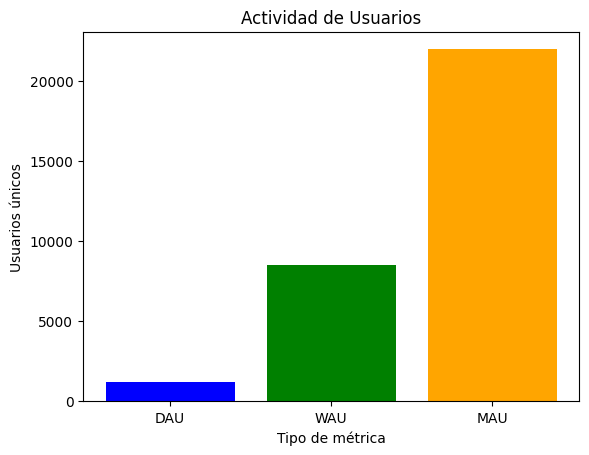

In [14]:
categorias = ['DAU', 'WAU', 'MAU']
valores = [1200, 8500, 22000]  # Ejemplo de usuarios activos

plt.bar(categorias, valores, color=['blue', 'green', 'orange'])
plt.xlabel('Tipo de métrica')
plt.ylabel('Usuarios únicos')
plt.title('Actividad de Usuarios')

plt.show()

Aqui podemos ver que si DAU es bajo, en comparación con WAU y MAU, significa que los usuarios no acceden diariamente, pero sí lo hacen con frecuencia semanal o mensual. Y si DAU es alto, indica que los usuarios están interactuando con la plataforma todos los días, lo cual es ideal para aplicaciones o servicios con uso constante. 
En cuanto a Mau puede ser que este atrayendo nuevos usuarios, pero no los está reteniendo a diario o semanalmente. 

### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [15]:
sessions_for_day = visits.groupby('session_day').agg({'uid':['count','nunique']})
sessions_for_day.columns = ['n_sessions', 'n_users']
sessions_for_day

,n_sessions,n_users
session_day,,
2017-06-01,664,605
2017-06-02,658,608
2017-06-03,477,445
2017-06-04,510,476
2017-06-05,893,820
...,...,...
2018-05-27,672,620
2018-05-28,1156,1039
2018-05-29,1035,948


In [16]:
#Proporcion
sessions_for_day['session_user'] = sessions_for_day['n_sessions'] / sessions_for_day['n_users']
sessions_for_day.head()

,n_sessions,n_users,session_user
session_day,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


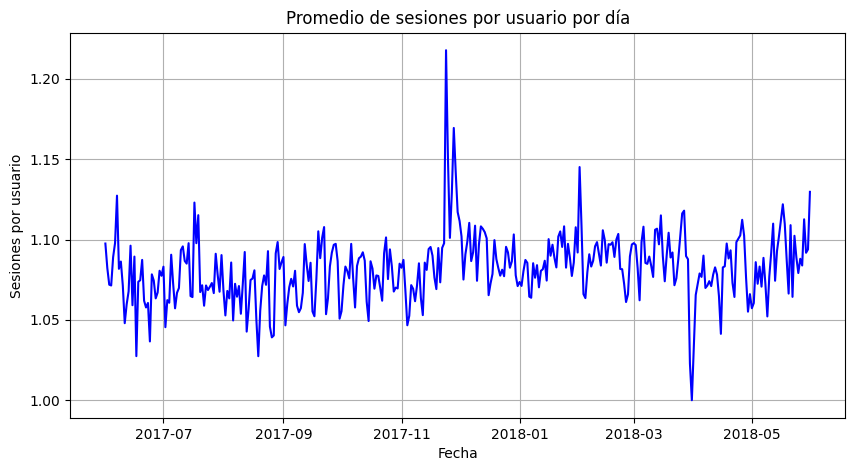

In [17]:
plt.figure(figsize=(10, 5))
sessions_for_day['session_user'].plot(kind='line', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Sesiones por usuario')
plt.title('Promedio de sesiones por usuario por día')
plt.grid(True)
plt.show()

In [18]:
# Cuál es la duración de cada sesión?
visits['duration_sessions'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits['duration_sessions'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration_sessions, dtype: float64

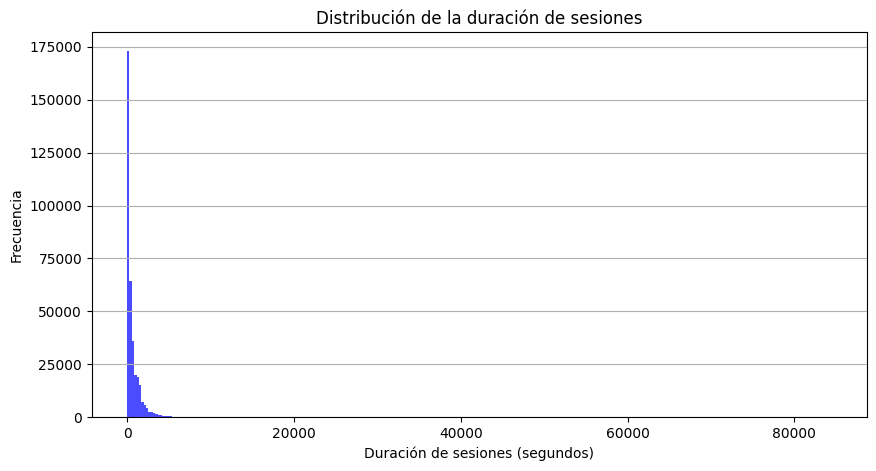

In [19]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.hist(visits['duration_sessions'], bins=300, color='blue', alpha=0.7)
plt.xlabel('Duración de sesiones (segundos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la duración de sesiones')
plt.grid(axis='y')
plt.show()

In [20]:
#Con qué frecuencia los usuarios regresan? / Tasa de Retencion

first_visits = visits.groupby('uid').agg({'start ts':'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_ts'] 
first_visits

,uid,first_session_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [21]:
#Extraer mes y dias
first_visits['first_session_day'] = first_visits['first_session_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_ts'].dt.to_period('M').dt.start_time

In [22]:
first_visits.head()

,uid,first_session_ts,first_session_day,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [23]:
#Fusionar Datos
total_visits = pd.merge(visits, first_visits)
total_visits.head()


,device,end ts,source id,start ts,uid,session_month,session_week,session_day,duration_sessions,first_session_ts,first_session_day,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-01


In [24]:
#Tasa de Retencion

total_visits['age_months'] = total_visits['session_month'].dt.month - total_visits['first_session_month'].dt.month
total_visits['age_months'] += 12*(total_visits['session_month'].dt.year - total_visits['first_session_month'].dt.year)
total_visits.head()

,device,end ts,source id,start ts,uid,session_month,session_week,session_day,duration_sessions,first_session_ts,first_session_day,first_session_month,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-01,0


In [25]:
#Analisis de Cohort

cohort = total_visits.pivot_table(index='first_session_month', 
                                  columns='age_months', 
                                  values='uid', 
                                  aggfunc='nunique' 
                                 )
cohort.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


## Ventas

### Cuando empieza la gente a comprar ?

In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [27]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [28]:
#Convierto a tipo de datos a to_datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [29]:
list_send = []

for name in orders.columns:
    minusculas = name.lower()
    list_send.append(minusculas)
        
list_send    

['buy ts', 'revenue', 'uid']

In [30]:
orders.columns = list_send
orders.columns

Index(['buy ts', 'revenue', 'uid'], dtype='object')

In [31]:
#Extraer Fecha y mes
orders['buy_dt'] = orders['buy ts'].dt.date
orders['order_month'] = orders['buy ts'].dt.to_period('M')
orders

,buy ts,revenue,uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05


In [32]:
#Primeras Ordenes
first_orders = orders.groupby('uid').agg({'buy ts':'min'}).reset_index()
first_orders.columns = ['uid', 'first_orders']
first_orders

,uid,first_orders
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [33]:
#ExTraer Mes y Fecha

first_orders['first_order_dt'] = first_orders['first_orders'].dt.date
first_orders['first_order_month'] = first_orders['first_orders'].dt.to_period('M')
first_orders

,uid,first_orders,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02


In [34]:
#Crear DF con primeras ordenes + primeras visitas
buyers = pd.merge(first_visits,first_orders)
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36523 non-null  uint64        
 1   first_session_ts     36523 non-null  datetime64[ns]
 2   first_session_day    36523 non-null  object        
 3   first_session_month  36523 non-null  datetime64[ns]
 4   first_orders         36523 non-null  datetime64[ns]
 5   first_order_dt       36523 non-null  object        
 6   first_order_month    36523 non-null  period[M]     
dtypes: datetime64[ns](3), object(2), period[M](1), uint64(1)
memory usage: 2.2+ MB


In [35]:
buyers['first_session_day'] = pd.to_datetime(buyers['first_session_day'])
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36523 non-null  uint64        
 1   first_session_ts     36523 non-null  datetime64[ns]
 2   first_session_day    36523 non-null  datetime64[ns]
 3   first_session_month  36523 non-null  datetime64[ns]
 4   first_orders         36523 non-null  datetime64[ns]
 5   first_order_dt       36523 non-null  datetime64[ns]
 6   first_order_month    36523 non-null  period[M]     
dtypes: datetime64[ns](5), period[M](1), uint64(1)
memory usage: 2.2 MB


In [36]:
#Cuando empieza a comprar la gente 
buyers['first_buy'] = ((buyers['first_order_dt'] - buyers['first_session_ts']) / np.timedelta64(1,'D')).astype('int')

<AxesSubplot:ylabel='Frequency'>

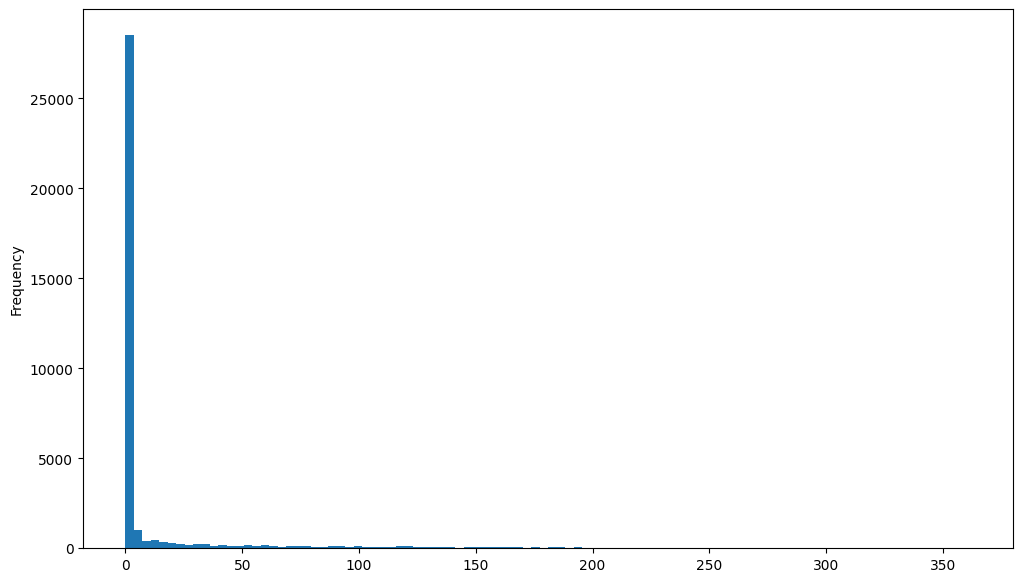

In [37]:
buyers['first_buy'].plot(kind='hist', bins=100, figsize=(12,7))

### 2. Cuantos pedidos hacen durante un periodo de tiempo

In [38]:
cohort_size = buyers.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_size.rename(columns={'uid':'n_buyers'},inplace=True)
cohort_size

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [39]:
cohorts = pd.merge(orders,buyers, how='inner', on='uid').groupby(['first_order_month','order_month']).agg({'revenue':'count'}).reset_index()
cohorts

,first_order_month,order_month,revenue
0,2017-06,2017-06,2354
1,2017-06,2017-07,177
2,2017-06,2017-08,174
3,2017-06,2017-09,226
4,2017-06,2017-10,292
...,...,...,...
74,2018-03,2018-05,176
75,2018-04,2018-04,2495
76,2018-04,2018-05,195
77,2018-05,2018-05,3249


In [40]:
cohorts['cicle_life'] = (cohorts['order_month'] - cohorts['first_order_month']).apply(lambda x:x.n) 
cohorts

,first_order_month,order_month,revenue,cicle_life
0,2017-06,2017-06,2354,0
1,2017-06,2017-07,177,1
2,2017-06,2017-08,174,2
3,2017-06,2017-09,226,3
4,2017-06,2017-10,292,4
...,...,...,...,...
74,2018-03,2018-05,176,2
75,2018-04,2018-04,2495,0
76,2018-04,2018-05,195,1
77,2018-05,2018-05,3249,0


In [41]:
cohorts.rename(columns={'revenue':'n_orders' },inplace=True)
cohorts

,first_order_month,order_month,n_orders,cicle_life
0,2017-06,2017-06,2354,0
1,2017-06,2017-07,177,1
2,2017-06,2017-08,174,2
3,2017-06,2017-09,226,3
4,2017-06,2017-10,292,4
...,...,...,...,...
74,2018-03,2018-05,176,2
75,2018-04,2018-04,2495,0
76,2018-04,2018-05,195,1
77,2018-05,2018-05,3249,0


In [42]:
report = pd.merge(cohort_size,cohorts, on='first_order_month')
report

,first_order_month,n_buyers,order_month,n_orders,cicle_life
0,2017-06,2023,2017-06,2354,0
1,2017-06,2023,2017-07,177,1
2,2017-06,2023,2017-08,174,2
3,2017-06,2023,2017-09,226,3
4,2017-06,2023,2017-10,292,4
...,...,...,...,...,...
74,2018-03,3533,2018-05,176,2
75,2018-04,2276,2018-04,2495,0
76,2018-04,2276,2018-05,195,1
77,2018-05,2988,2018-05,3249,0


In [43]:
report['order_by_buyer'] = report['n_orders'] / report['n_buyers']
report

,first_order_month,n_buyers,order_month,n_orders,cicle_life,order_by_buyer
0,2017-06,2023,2017-06,2354,0,1.163618
1,2017-06,2023,2017-07,177,1,0.087494
2,2017-06,2023,2017-08,174,2,0.086011
3,2017-06,2023,2017-09,226,3,0.111715
4,2017-06,2023,2017-10,292,4,0.144340
...,...,...,...,...,...,...
74,2018-03,3533,2018-05,176,2,0.049816
75,2018-04,2276,2018-04,2495,0,1.096221
76,2018-04,2276,2018-05,195,1,0.085677
77,2018-05,2988,2018-05,3249,0,1.087349


In [44]:
#Calculo de LTV

LTV = report.pivot_table(index='first_order_month', columns='cicle_life', values='order_by_buyer', aggfunc='sum').cumsum(axis=1)
LTV.round(2).fillna('')

cicle_life,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02,1.12,1.18,1.21,1.22,,,,,,,,


In [45]:
print('Promedio de Ordenes por comprador', round(LTV[5].mean(),2))

Promedio de Ordenes por comprador 1.43


### 3. Cual es el tamaño promedio de compra ?


In [46]:
print('Promedio de compra',round(orders['revenue'].mean(),2))

Promedio de compra 5.0


In [47]:
avg_orders = orders.pivot_table(index='order_month', values='revenue',aggfunc='mean')
avg_orders

,revenue
order_month,
2017-06,4.060106
2017-07,5.306589
2017-08,4.847139
2017-09,5.416448
2017-10,4.928280
2017-11,4.783518
2017-12,5.852139
2018-01,4.112927
2018-02,4.840095


Text(0.5, 1.0, 'Average Purchase by Month')

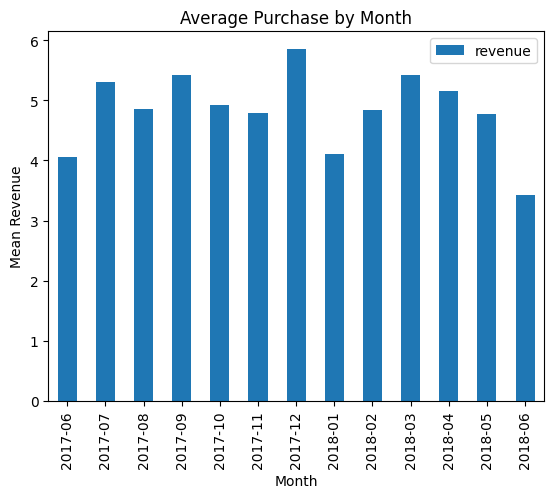

In [48]:
avg_orders.plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Mean Revenue')
plt.title('Average Purchase by Month')

### 4.¿Cuánto dinero traen? (LTV)

In [49]:
cohort_long = buyers.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_long.rename(columns={'uid':'n_buyers'},inplace=True)
cohort_long

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [50]:
cohort_2 = pd.merge(orders,buyers, on='uid').groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
cohort_2

,first_order_month,order_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58
...,...,...,...
74,2018-03,2018-05,1114.87
75,2018-04,2018-04,10600.69
76,2018-04,2018-05,1209.92
77,2018-05,2018-05,13925.76


In [51]:
cohort_2['cicle_life'] = (cohort_2['order_month'] - cohort_2['first_order_month']).apply(lambda x:x.n) 
cohort_2

,first_order_month,order_month,revenue,cicle_life
0,2017-06,2017-06,9557.49,0
1,2017-06,2017-07,981.82,1
2,2017-06,2017-08,885.34,2
3,2017-06,2017-09,1931.30,3
4,2017-06,2017-10,2068.58,4
...,...,...,...,...
74,2018-03,2018-05,1114.87,2
75,2018-04,2018-04,10600.69,0
76,2018-04,2018-05,1209.92,1
77,2018-05,2018-05,13925.76,0


In [52]:
report_2 = pd.merge(cohort_long, cohort_2)
report_2['LTV'] = report_2['revenue'] / report_2['n_buyers']
report_2

,first_order_month,n_buyers,order_month,revenue,cicle_life,LTV
0,2017-06,2023,2017-06,9557.49,0,4.724414
1,2017-06,2023,2017-07,981.82,1,0.485329
2,2017-06,2023,2017-08,885.34,2,0.437637
3,2017-06,2023,2017-09,1931.30,3,0.954671
4,2017-06,2023,2017-10,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03,3533,2018-05,1114.87,2,0.315559
75,2018-04,2276,2018-04,10600.69,0,4.657597
76,2018-04,2276,2018-05,1209.92,1,0.531599
77,2018-05,2988,2018-05,13925.76,0,4.660562


In [53]:
report_2 = report_2.pivot_table(index='first_order_month', columns='cicle_life', values='LTV', aggfunc='sum').cumsum(axis=1)
report_2.round(2).fillna('')

cicle_life,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02,4.16,4.44,4.51,4.59,,,,,,,,


In [54]:
print('Promedio del LTV', round(report_2[5].mean(),2))

Promedio del LTV 7.97


## Marketing

### Cuanto dinero gasto (Total/por fuente de adquisición/a lo largo del tiempo)

In [55]:
print('Total de costos:', costs['costs'].sum())

Total de costos: 329131.62


In [56]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month_costs'] = costs['dt'].dt.to_period('M')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   source_id    2542 non-null   int64         
 1   dt           2542 non-null   datetime64[ns]
 2   costs        2542 non-null   float64       
 3   month_costs  2542 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), period[M](1)
memory usage: 79.6 KB


In [57]:
#Por fuentes de adquisicion
costs.groupby('source_id').agg({'costs':'sum'})

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


<AxesSubplot:title={'center':'Costs by Source Adquisition'}, xlabel='month', ylabel='costs'>

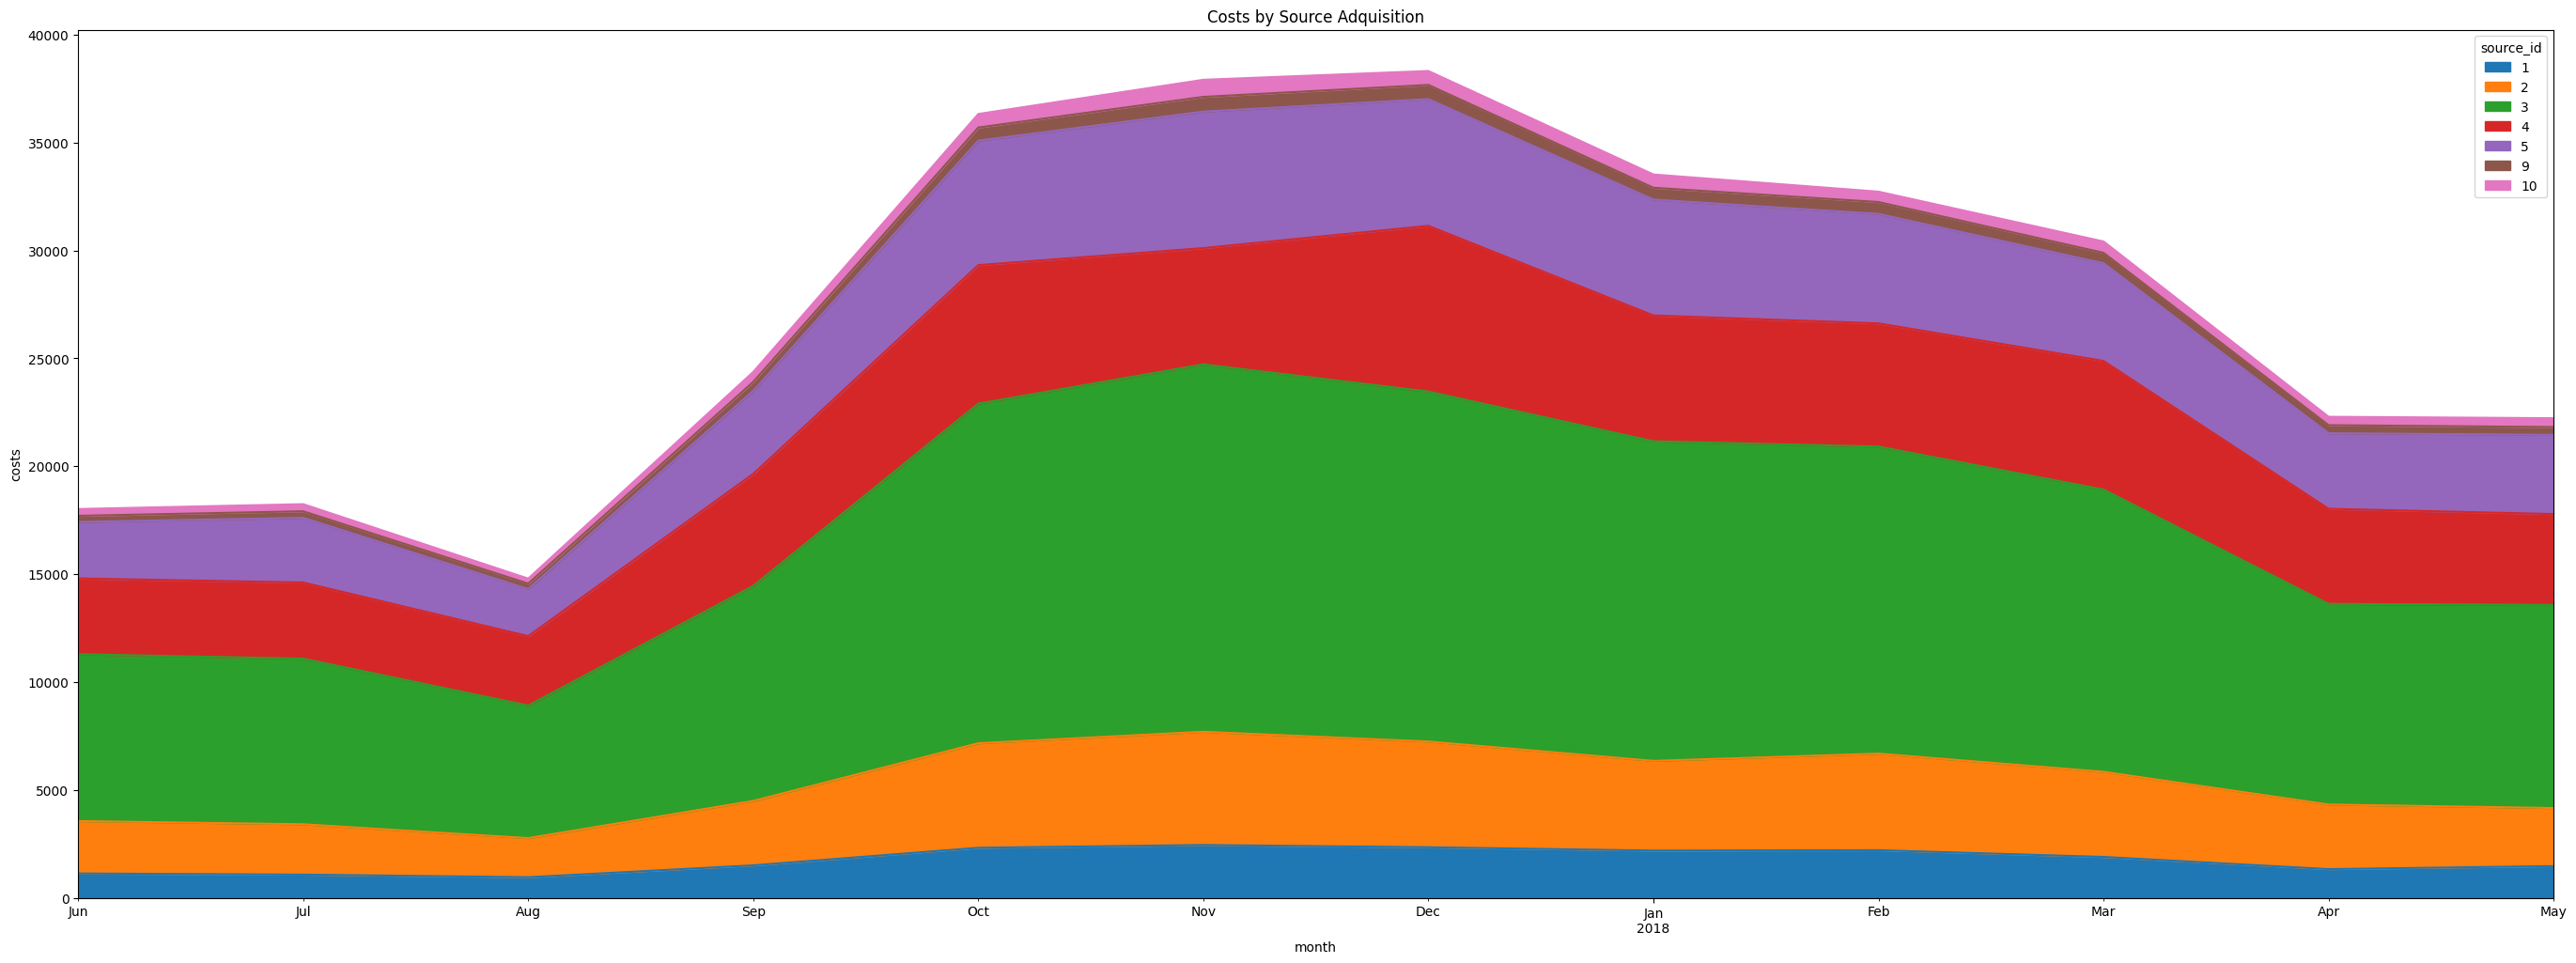

In [58]:
# A lo largo del tiempo
costs.pivot_table(
    index='month_costs', 
    columns='source_id', 
    values='costs', 
    aggfunc='sum'
).plot.area(figsize=(34,12), title='Costs by Source Adquisition', xlabel= 'month', ylabel='costs')

### 2.¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


In [59]:
print('El Promedio del CAC es:', round(costs['costs'].sum() / orders['uid'].nunique(),2))

El Promedio del CAC es: 9.01


In [60]:
month_costs = costs.groupby('month_costs').agg({'costs':'sum'})
users = buyers.groupby('first_order_month').agg({'uid':'nunique'})

In [61]:
CAC_month = pd.merge(month_costs,users, left_index=True, right_index=True)
CAC_month

,costs,uid
2017-06,18015.00,2023
2017-07,18240.59,1923
2017-08,14790.54,1370
2017-09,24368.91,2581
2017-10,36322.88,4340
2017-11,37907.88,4081
2017-12,38315.35,4383
2018-01,33518.52,3373
2018-02,32723.03,3651
2018-03,30415.27,3533


In [62]:
CAC_month['cac'] = CAC_month['costs'] / CAC_month['uid']
CAC_month

,costs,uid,cac
2017-06,18015.00,2023,8.905091
2017-07,18240.59,1923,9.485486
2017-08,14790.54,1370,10.796015
2017-09,24368.91,2581,9.441654
2017-10,36322.88,4340,8.369327
2017-11,37907.88,4081,9.288870
2017-12,38315.35,4383,8.741809
2018-01,33518.52,3373,9.937302
2018-02,32723.03,3651,8.962758
2018-03,30415.27,3533,8.608907


<AxesSubplot:title={'center':'Average CAC by Month'}, xlabel='month', ylabel='cac'>

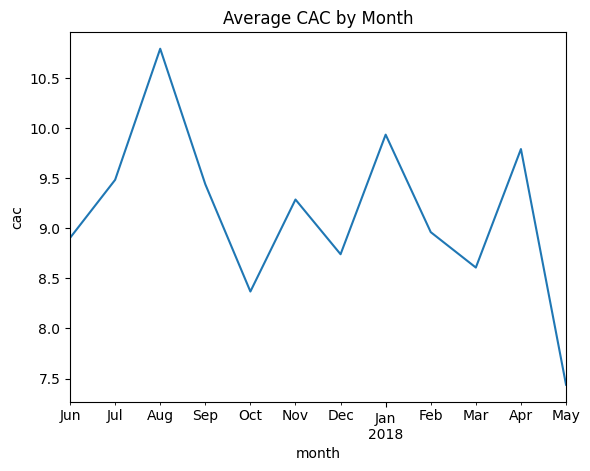

In [63]:
CAC_month['cac'].plot(title='Average CAC by Month', xlabel='month', ylabel='cac')

In [64]:
#Primer fuente por cada visitante

users = total_visits.sort_values('first_session_ts').groupby('uid').first()

users = users[['source id']]

buyers = pd.merge(buyers,users, left_on='uid', right_index=True)
buyers.head()

,uid,first_session_ts,first_session_day,first_session_month,first_orders,first_order_dt,first_order_month,first_buy,source id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11,0,5


In [65]:
#Se agregan las fuentes y el total de compradores

daily_buyers = buyers.groupby(['source id', 'first_order_dt']).agg({'uid':'count'}).reset_index()
daily_buyers.rename(columns= {'uid':'n_buyers', 'source id':'source_id'},inplace=True)
daily_buyers

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,15
1,1,2017-06-02,11
2,1,2017-06-03,7
3,1,2017-06-04,4
4,1,2017-06-05,16
...,...,...,...
2456,10,2018-05-27,2
2457,10,2018-05-28,8
2458,10,2018-05-29,2
2459,10,2018-05-30,5


In [66]:
#Preparamos nueva tabla de costos para calcular el CAC
costs_ = pd.merge(daily_buyers, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_

,source_id,first_order_dt,n_buyers,dt,costs,month_costs
0,1,2017-06-01,15,2017-06-01,75.20,2017-06
1,1,2017-06-02,11,2017-06-02,62.25,2017-06
2,1,2017-06-03,7,2017-06-03,36.53,2017-06
3,1,2017-06-04,4,2017-06-04,55.00,2017-06
4,1,2017-06-05,16,2017-06-05,57.08,2017-06
...,...,...,...,...,...,...
2454,10,2018-05-27,2,2018-05-27,9.92,2018-05
2455,10,2018-05-28,8,2018-05-28,21.26,2018-05
2456,10,2018-05-29,2,2018-05-29,11.32,2018-05
2457,10,2018-05-30,5,2018-05-30,33.15,2018-05


In [67]:
#Calculo del CAC
costs_['cac'] = costs_['costs'] / costs_['n_buyers']
costs_

,source_id,first_order_dt,n_buyers,dt,costs,month_costs,cac
0,1,2017-06-01,15,2017-06-01,75.20,2017-06,5.013333
1,1,2017-06-02,11,2017-06-02,62.25,2017-06,5.659091
2,1,2017-06-03,7,2017-06-03,36.53,2017-06,5.218571
3,1,2017-06-04,4,2017-06-04,55.00,2017-06,13.750000
4,1,2017-06-05,16,2017-06-05,57.08,2017-06,3.567500
...,...,...,...,...,...,...,...
2454,10,2018-05-27,2,2018-05-27,9.92,2018-05,4.960000
2455,10,2018-05-28,8,2018-05-28,21.26,2018-05,2.657500
2456,10,2018-05-29,2,2018-05-29,11.32,2018-05,5.660000
2457,10,2018-05-30,5,2018-05-30,33.15,2018-05,6.630000


In [68]:
#Promedio del CAC por ciclo de vida
costs_.pivot_table(index='month_costs', columns='source_id', values='cac', aggfunc='mean')

source_id,1,2,3,4,5,9,10
month_costs,,,,,,,
2017-06,8.399500,11.638671,19.871444,10.354197,9.497680,3.938523,5.146663
2017-07,7.520656,14.802695,20.739635,8.011575,8.052391,4.899948,6.064029
2017-08,10.416208,16.575783,24.472306,11.346692,7.577378,4.301125,5.510714
2017-09,5.992584,11.966994,15.836609,9.604455,6.949748,6.099033,9.053499
2017-10,6.556509,11.113931,16.329433,6.225777,6.656248,4.581168,7.801438
2017-11,6.857989,12.448696,19.129713,5.318326,9.703653,6.761584,10.197252
2017-12,5.920813,11.384372,14.803376,5.771596,8.866229,6.720603,9.036475
2018-01,7.503699,13.381165,17.278318,6.156457,9.558306,6.202830,9.672831
2018-02,7.176733,13.568261,15.488387,5.694310,7.679655,7.499153,4.922362


###  3. ¿Cuán rentables eran las inversiones? (ROMI)

In [69]:
#Preparo la tabla para trabajar con las fuentes 

month_revenue = orders.groupby(['uid','order_month']).agg({'revenue':'sum'}).reset_index()
buyers = buyers.merge(month_revenue,on='uid')
buyers.head()

,uid,first_session_ts,first_session_day,first_session_month,first_orders,first_order_dt,first_order_month,first_buy,source id,order_month,revenue
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01,106,2,2018-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06,0,10,2017-06,3.05
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10,0,3,2017-10,73.33
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01,0,5,2018-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11,0,5,2017-11,10.99


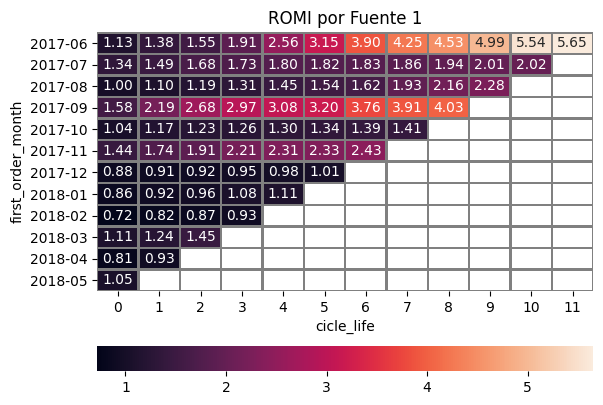

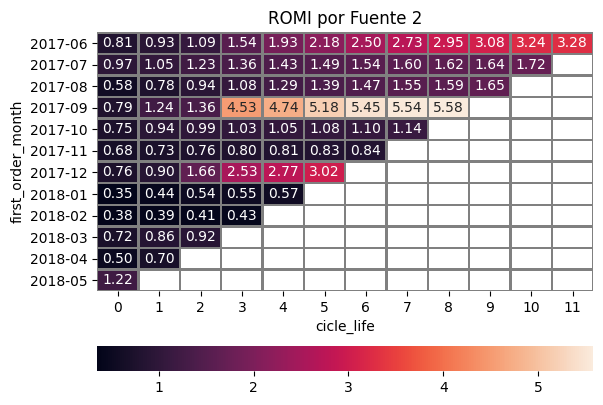

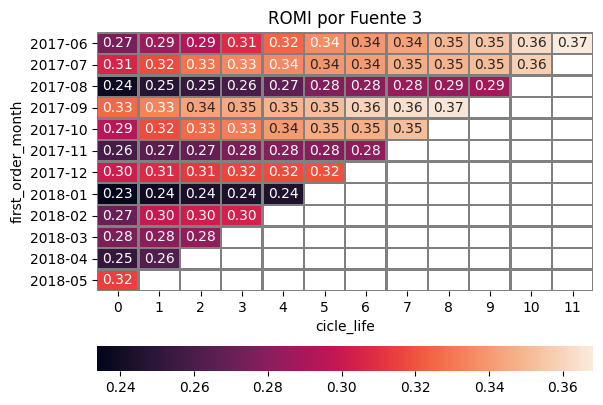

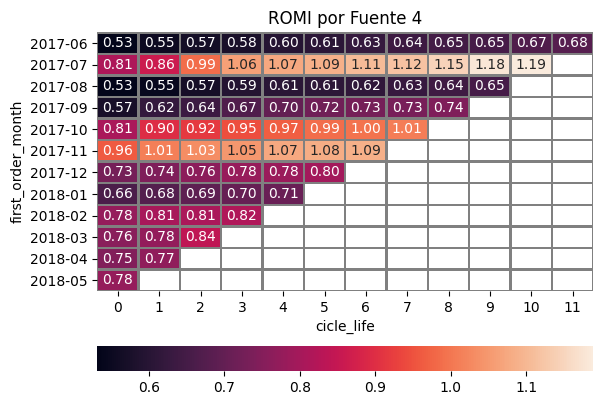

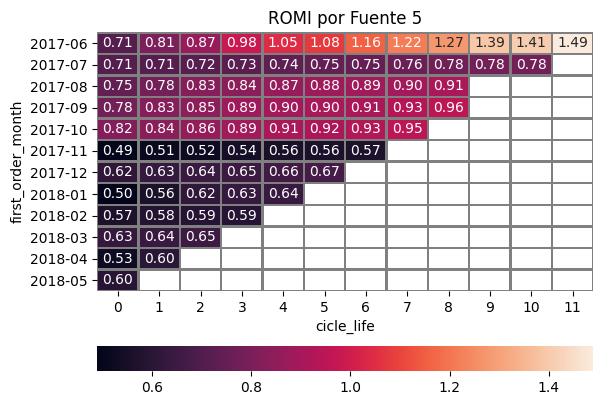

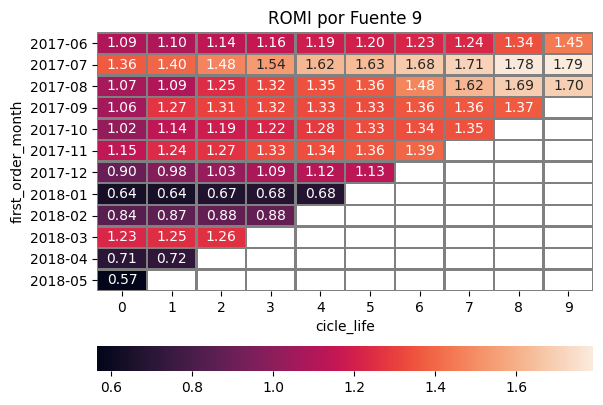

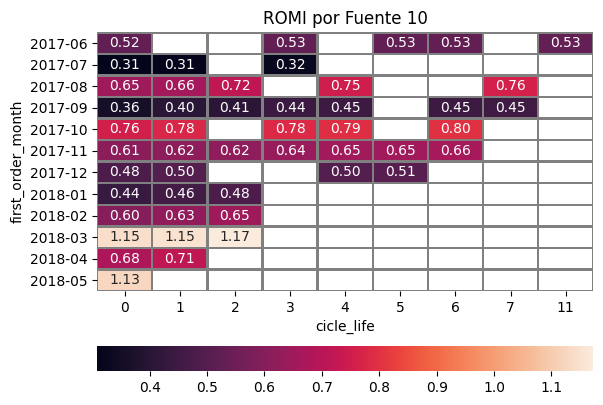

In [70]:
#Se calcula el ROMI por cada una de las fuentes de adquisicion

for source, df in buyers.groupby('source id'):
    if source !=7:

        cohort_long = (
            df.groupby(['source id', 'first_order_month'])\
            .agg({'uid':'nunique'})
            .reset_index()
        )

        cohort_long.columns = ['source_id', 'first_order_month', 'n_buyers']

        cohorts_revenue = (
            df.groupby(['source id', 'first_order_month', 'order_month'])\
            .agg({'revenue':'sum'})\
            .reset_index()
        )
        cohorts_revenue.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

        romi_report = pd.merge(cohort_long, cohorts_revenue, on=['source_id', 'first_order_month'])

        romi_report['cicle_life'] = (romi_report['order_month']-romi_report['first_order_month']).apply(lambda x: x.n)
        
        romi_report['cicle_life'] = romi_report['cicle_life'].round().astype('int')
        romi_report['ltv'] = romi_report['gp'] / romi_report['n_buyers']

        romi_report = pd.merge(romi_report, costs.groupby(['source_id', 'month_costs']).agg({'costs':'sum'}).reset_index(),
                                left_on=['source_id', 'first_order_month'], right_on = ['source_id', 'month_costs'])

        romi_report = romi_report.drop(['month_costs'],axis=1)
        romi_report['cac'] = romi_report['costs'] / romi_report['n_buyers']
        romi_report['romi'] = romi_report['ltv'] / romi_report['cac']

        romi = romi_report\
                .pivot_table(index='first_order_month', columns='cicle_life', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
        romi.round(2).fillna('')

        romi.index = romi.index.astype(str)
        sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation':'horizontal'}
                   ).set(title='ROMI por Fuente {}'.format(source))
        plt.show()

## Conclusiones Generales


- Almacenamos los datos de visitas, pedidos y gastos en variables.  Optimizamos los datos para el análisis. Nos aseguramos de que cada   columna contenga el tipo de datos correcto.
- Para el dataset de visitas:
- Calculamos cuántas personas lo usan cada día, semana y mes
- Se cacularon cuántas sesiones hay por día.
- Se calcularon Cuál es la duración de cada sesión
- Revisamos con qué frecuencia los usuarios regresan

Para el dataset de ventas:
- Observamos cuándo empieza la gente a comprar por medio del análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. 
- Calculamos cuántos pedidos hacen durante un período de tiempo dado
- Revisamos cuál es el tamaño promedio de compra y cuánto dinero traen (LTV)

Para el dataset de Marketing
 - Verificamos cuánto dinero se gastó por total, por fuente de adquisición y a lo largo del tiempo 
 - Calculamos cuál fue el costo de adquisición de clientes de cada una de las fuentes
 - Observamos cuán rentables eran las inversiones (ROMI)